# Descrição

**Proposta:** Aplicação de Ciência de Dados em informações sobre demanda de reservas no setor hoteleiro.

**Conjunto de Dados:** Este conjunto de dados contém informações de reserva para um hotel urbano e um hotel resort e inclui informações como quando a reserva foi feita, duração da estadia, número de adultos, crianças e/ou bebês e o número de vagas de estacionamento disponíveis, entre outras coisas. Todas as informações de identificação pessoal foram removidas dos dados.
*   Para mais informações sobre o conjunto de dados, e seu download, [clique aqui](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand);
  *   Caso não consiga baixar pelo link anterior, [clique aqui](https://drive.google.com/file/d/1kRjGWRmOIk2FVlP0Bgch7TNnI3jpJU5Q/view);

**Objetivos:**
  * Apresentar tomada(s) de decisão ao gerente do hotel para maximizar o lucro, com as devidas justificativas pelo conhecimento obtido a partir dos dados.
  * Dois pontos: pitch (apresentação para vender suas ideias no mercado) e conteúdo técnico.

**Conteúdo Técnico**
O arquivo de texto do projeto deve apresentar, pelo menos, as seguintes seções:
  * **Aplicação**: detalhamento da proposta do trabalho, detalhando os objetivos a serem
alcançados;
  * **Experimentos**:
    * **Base de dados**: descrição da origem dos dados, técnicas de pré-processamento (limpeza, integração, redução);
    * **Estatística** descritiva e inferência: uso de gráficos e estatísticas para detalhar os dados;
    * **Métodos avaliados**: descrição de métodos de Aprendizagem de Máquina usados;

* **Métricas de avaliação**:
  * métricas usadas para avaliar os métodos (F- measure, AUC, taxa de
acerto);
  * uso de amostragem para avaliar os modelos (k-fold cross-validation leave-one-out, bootstrap)

* **Resultados**:
 * Apresentação dos resultados, demonstrando a justificativa da sua ideia ser
válida, funcional e eficiente, assim como trazer uma discussão com as
observações necessárias. Fazer uso de testes de hipótese para dar suporte às
afirmações.
 * Conclusão: resumo do que foi realizado no projeto e principais observações.
 * Bibliografia: obras consultadas e/ou citadas

**Estilo**
O documento deve seguir o modelo de confecção de artigos para conferências segundo a
Sociedade Brasileira de Computação (SBC). O link [1] possui modelos em doc e latex do
site da SBC. O link [2] possui o modelo em latex da Overleaf.

[1]https://www.sbc.org.br/documentos-da-sbc/summary/169-templates-para-artigos-e-
capitulos-de-livros/878-modelosparapublicaodeartigos

[2]https://pt.overleaf.com/latex/templates/sbc-conferences-template/blbxwjwzdngr
O tamanho é limitado a 12 páginas.

**Apresentação**
O aluno deve apresentar o seu trabalho motivando sua análise, metodologia de tratamento
dos dados, metodologia de experimentação e conclusões.

**Submissão**
Deve-se entregar os seguintes arquivos (em .zip ou .rar):
* Documento do texto (em pdf);
* Código utilizado nos experimentos;
* Apresentação;
Enviar usando o classroom da disciplina na atividade “Projeto”

**Avaliação**
* Uso abrangente e adequado de Estatística, Mineração de Dados, Aprendizagem
de Máquina, Visualização de Dados (4,0 pontos);
* Uso das informações obtidas para aplicação à tomada de decisão (6,0 pontos)
* Ponto extra para a equipe vencedora.



# Principal

In [52]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import keras
from keras.layers import Dense
from keras.models import Sequential

In [54]:
hotel_raw_df = pd.read_csv('hotel_bookings.csv')
hotel_raw_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
hotel_raw_df.shape

(119390, 32)

In [4]:
hotel_raw_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
hotel_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
filter = (hotel_raw_df.children == 0) & (hotel_raw_df.adults == 0) & (hotel_raw_df.babies == 0)
hotel_raw_df[~filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
top_countries_with_codes = hotel_raw_df.country.value_counts().head(10)
top_countries_with_codes

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

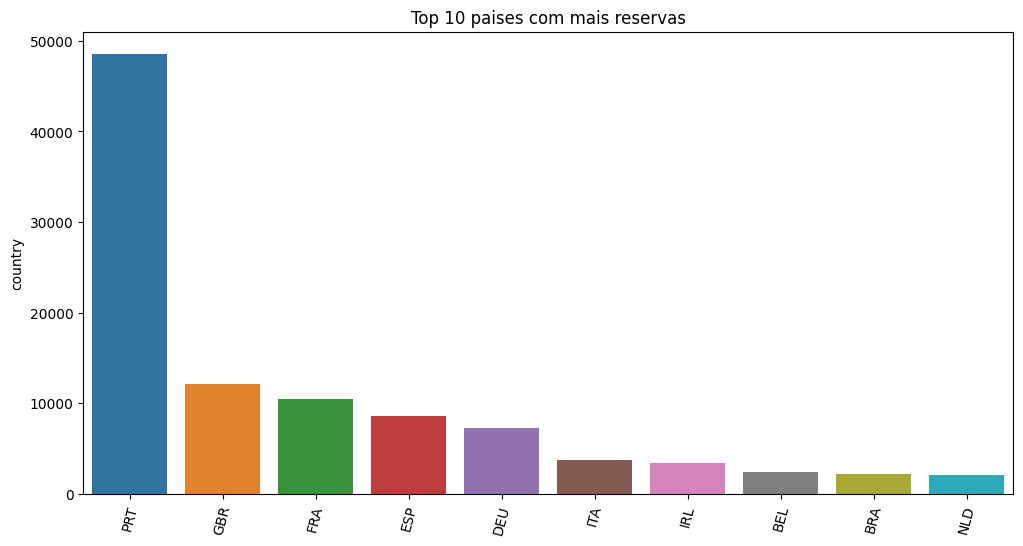

In [8]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 paises com mais reservas')
sns.barplot(x=top_countries_with_codes.index, y=top_countries_with_codes);

In [ ]:
guests = hotel_raw_df[hotel_raw_df['is_canceled'] == 0].groupby('country')['adults'].sum().reset_index()
guests_df = pd.DataFrame({'country': guests['country'], 'N of guests': guests['adults']})
print(guests_df)

   country  N of guests
0      AGO            3
1      ALB            2
2      ARG           25
3      ARM            2
4      AUS           31
..     ...          ...
78     USA          152
79     VEN            4
80     ZAF            6
81     ZMB            2
82     ZWE            2

[83 rows x 2 columns]


In [ ]:
hotel_raw_df = pd.read_csv('hotel_bookings.csv')

# Select the string columns
string_columns = hotel_raw_df.select_dtypes(include=['object']).columns

# Create a dictionary to map the numerical values back to the original string values
mapping_dict = {}

# Convert the string columns into numerical values and treat NaN values as a new category
for col in string_columns:
    hotel_raw_df[col] = hotel_raw_df[col].fillna('NaN')
    mapping_dict[col] = dict(enumerate(hotel_raw_df[col].astype('category').cat.categories))
    hotel_raw_df[col] = hotel_raw_df[col].astype('category').cat.codes

sns.pairplot(hotel_raw_df.sample(frac=0.01), hue="is_canceled")

is_canceled	lead_time	

In [ ]:
hotel_raw_df.corr()

In [ ]:
largest_corrs = (hotel_raw_df.corr()).abs().unstack().sort_values(ascending=False).drop_duplicates().nlargest(20)

# Display the result
print(largest_corrs)

In [ ]:
spearman_corr_matrix = hotel_raw_df.corr(method='spearman')

# print("Spearman correlation matrix:")
# print(spearman_corr_matrix)

In [ ]:
kendall_corr_matrix = hotel_raw_df.corr(method='kendall')

# print("Kendall correlation matrix:")
# print(kendall_corr_matrix)

In [ ]:
largest_spearman_corrs = spearman_corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().nlargest(11)


largest_kendall_corrs = kendall_corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().nlargest(11)

# Display the results
print("10 largest Spearman correlations:")
print()
print(largest_spearman_corrs)
print("\n===========================================================\n")
print("10 largest Kendall correlations:")
print()
print(largest_kendall_corrs)

In [ ]:
string_columns = hotel_raw_df.select_dtypes(include=['object']).columns
hotel_raw_df[string_columns] = hotel_raw_df[string_columns].apply(lambda x: x.astype('category').cat.codes)

hotel_raw_df

In [ ]:
hotel_raw_df = pd.read_csv('hotel_bookings.csv')

# Select the string columns
string_columns = hotel_raw_df.select_dtypes(include=['object']).columns

# Create a dictionary to map the numerical values back to the original string values
mapping_dict = {}

# Convert the string columns into numerical values and treat NaN values as a new category
for col in string_columns:
    hotel_raw_df[col] = hotel_raw_df[col].fillna('NaN')
    mapping_dict[col] = dict(enumerate(hotel_raw_df[col].astype('category').cat.categories))
    hotel_raw_df[col] = hotel_raw_df[col].astype('category').cat.codes

# Calculate the correlation matrix
corr_matrix = hotel_raw_df.corr()

largest_corrs = (hotel_raw_df.corr()).abs().unstack().sort_values(ascending=False).drop_duplicates().nlargest(20)

largest_corrs
# Create a list to store the correlations
correlations = []

# Store the correlations between the different string columns with their original names
for col1 in string_columns:
    for col2 in string_columns:
        if col1 != col2:
            correlations.append((col1, col2, corr_matrix.loc[col1, col2]))

# Create a new DataFrame to store the correlations
corr_df = pd.DataFrame(correlations, columns=['Column 1', 'Column 2', 'Correlation'])

# Remove duplicate values
corr_df['Columns'] = corr_df[['Column 1', 'Column 2']].apply(frozenset, axis=1)
corr_df = corr_df.drop_duplicates('Columns')
corr_df.drop('Columns', axis=1, inplace=True)

# Sort the correlations in ascending order
corr_df.sort_values(by='Correlation', inplace=True)

# Print the resulting DataFrame
print(corr_df)

In [ ]:
mapping_dict

Analise de predição por comparação abaixo:

In [9]:
hotel_raw_df.isnull().sum() #valor total de nulos

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
#limpeza de dados (null -> 0)
hotel_raw_df.fillna(0, inplace = True)

In [11]:
#De onde os hospedes estão vindo?
guests = hotel_raw_df[hotel_raw_df['is_canceled'] == 0]['country'].value_counts().reset_index()
guests.columns = ['País', 'N. de hospedes']
guests

,País,N. de hospedes
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [12]:
#variação dos preços para cada tipo de hotel
dados_city = hotel_raw_df[(hotel_raw_df['hotel'] == 'City Hotel') & (hotel_raw_df['is_canceled'] == 0)]
dados_resort = hotel_raw_df[(hotel_raw_df['hotel'] == 'Resort Hotel') & (hotel_raw_df['is_canceled'] == 0)]

In [13]:
city = dados_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [14]:
resort = dados_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [15]:
comparativo = city.merge(resort, on = 'arrival_date_month')
comparativo.columns = ['Mês', 'Preço do Hotel', 'Preço do Resort']
comparativo

,Mês,Preço do Hotel,Preço do Resort
0,April,111.856824,75.867816
1,August,118.412083,181.205892
2,December,87.856764,68.322236
3,February,86.183025,54.147478
4,January,82.160634,48.708919
5,July,115.563810,150.122528
6,June,117.702075,107.921869
7,March,90.170722,57.012487
8,May,120.445842,76.657558
9,November,86.500456,48.681640


In [16]:
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
comparativo['Mês'] = pd.Categorical(comparativo['Mês'], categories=meses, ordered=True)
comparativo = comparativo.sort_values('Mês')
comparativo

,Mês,Preço do Hotel,Preço do Resort
4,January,82.160634,48.708919
3,February,86.183025,54.147478
7,March,90.170722,57.012487
0,April,111.856824,75.867816
8,May,120.445842,76.657558
6,June,117.702075,107.921869
5,July,115.563810,150.122528
1,August,118.412083,181.205892
11,September,112.598452,96.416860
10,October,101.745956,61.727505


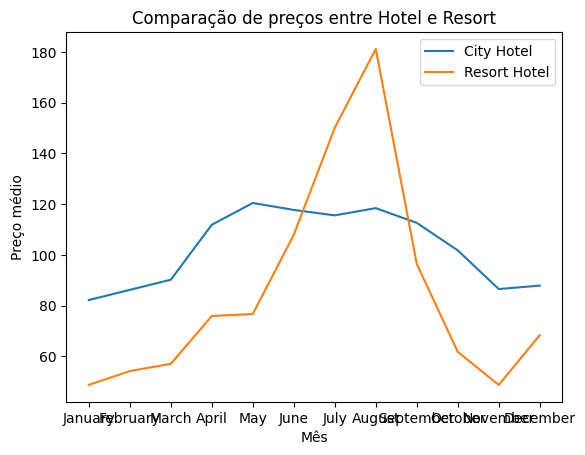

'O preço dos resorts aumentam no verão (hemisferio norte) e o preço dos hoteis são mais constantes ao longo do ano'

In [17]:
plt.plot(comparativo['Mês'], comparativo['Preço do Hotel'], label='City Hotel')
plt.plot(comparativo['Mês'], comparativo['Preço do Resort'], label='Resort Hotel')
plt.xlabel('Mês')
plt.ylabel('Preço médio')
plt.title('Comparação de preços entre Hotel e Resort')
plt.legend()
plt.show()
'''O preço dos resorts aumentam no verão (hemisferio norte) e o preço dos hoteis são mais constantes ao longo do ano'''

In [18]:
hospedes_hotel = dados_city['arrival_date_month'].value_counts().reset_index()
hospedes_hotel = hospedes_hotel.rename(columns={'index': 'Mês', 'arrival_date_month': 'N de hospedes'})
hospedes_hotel

,Mês,N de hospedes
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [19]:
hospedes_resort = dados_resort['arrival_date_month'].value_counts().reset_index()
hospedes_resort = hospedes_resort.rename(columns={'index': 'Mês', 'arrival_date_month': 'N de hospedes'})
hospedes_resort

,Mês,N de hospedes
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [20]:
comparativo_hospedes = hospedes_hotel.merge(hospedes_resort, on='Mês')
comparativo_hospedes.columns = ['Mês', 'Hospedes em Hotel', 'Hospedes em Resort']
comparativo_hospedes

,Mês,Hospedes em Hotel,Hospedes em Resort
0,August,5381,3257
1,July,4782,3137
2,May,4579,2535
3,June,4366,2038
4,October,4337,2577
5,September,4290,2102
6,March,4072,2573
7,April,4015,2550
8,February,3064,2308
9,November,2696,1976


In [21]:
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
comparativo_hospedes['Mês'] = pd.Categorical(comparativo_hospedes['Mês'], categories=meses, ordered=True)
comparativo_hospedes = comparativo_hospedes.sort_values('Mês')
comparativo_hospedes

,Mês,Hospedes em Hotel,Hospedes em Resort
11,January,2254,1868
8,February,3064,2308
6,March,4072,2573
7,April,4015,2550
2,May,4579,2535
3,June,4366,2038
1,July,4782,3137
0,August,5381,3257
5,September,4290,2102
4,October,4337,2577


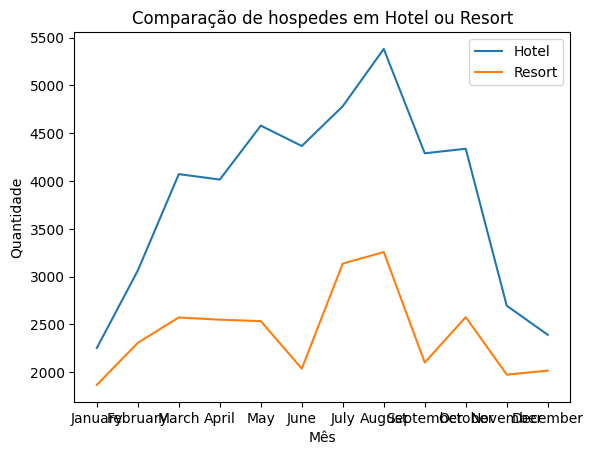

In [22]:
plt.plot(comparativo_hospedes['Mês'], comparativo_hospedes['Hospedes em Hotel'], label='Hotel')
plt.plot(comparativo_hospedes['Mês'], comparativo_hospedes['Hospedes em Resort'], label='Resort')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.title('Comparação de hospedes em Hotel ou Resort')
plt.legend()
plt.show()

In [23]:
# filter = hotel_raw_df['is_canceled'] == 0
dados = hotel_raw_df[hotel_raw_df['is_canceled'] == 0]
dados.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [24]:
dados['total_nights'] = dados['stays_in_weekend_nights'] + dados['stays_in_week_nights']
dados.head()

<ipython-input-24-8aef8b9daf73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['total_nights'] = dados['stays_in_weekend_nights'] + dados['stays_in_week_nights']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [25]:
permanencia = dados.groupby(['total_nights', 'hotel']).agg('count').reset_index()
permanencia = permanencia.iloc[:, :3]
permanencia = permanencia.rename(columns={'is_canceled':'N de permanencias'})
permanencia

,total_nights,hotel,N de permanencias
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


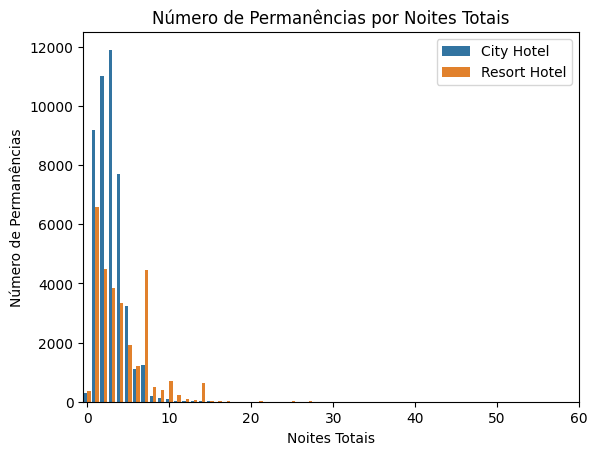

In [26]:
sns.barplot(x='total_nights', y='N de permanencias', hue='hotel', data=permanencia)

# set the title and labels
plt.title('Número de Permanências por Noites Totais')
plt.xlabel('Noites Totais')
plt.ylabel('Número de Permanências')
plt.xticks(range(0, len(permanencia), 10), range(0, len(permanencia), 10))
plt.legend(loc='upper right')
# show the plot
plt.show()

<ipython-input-27-fdb52bb483f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = hotel_raw_df.corr()


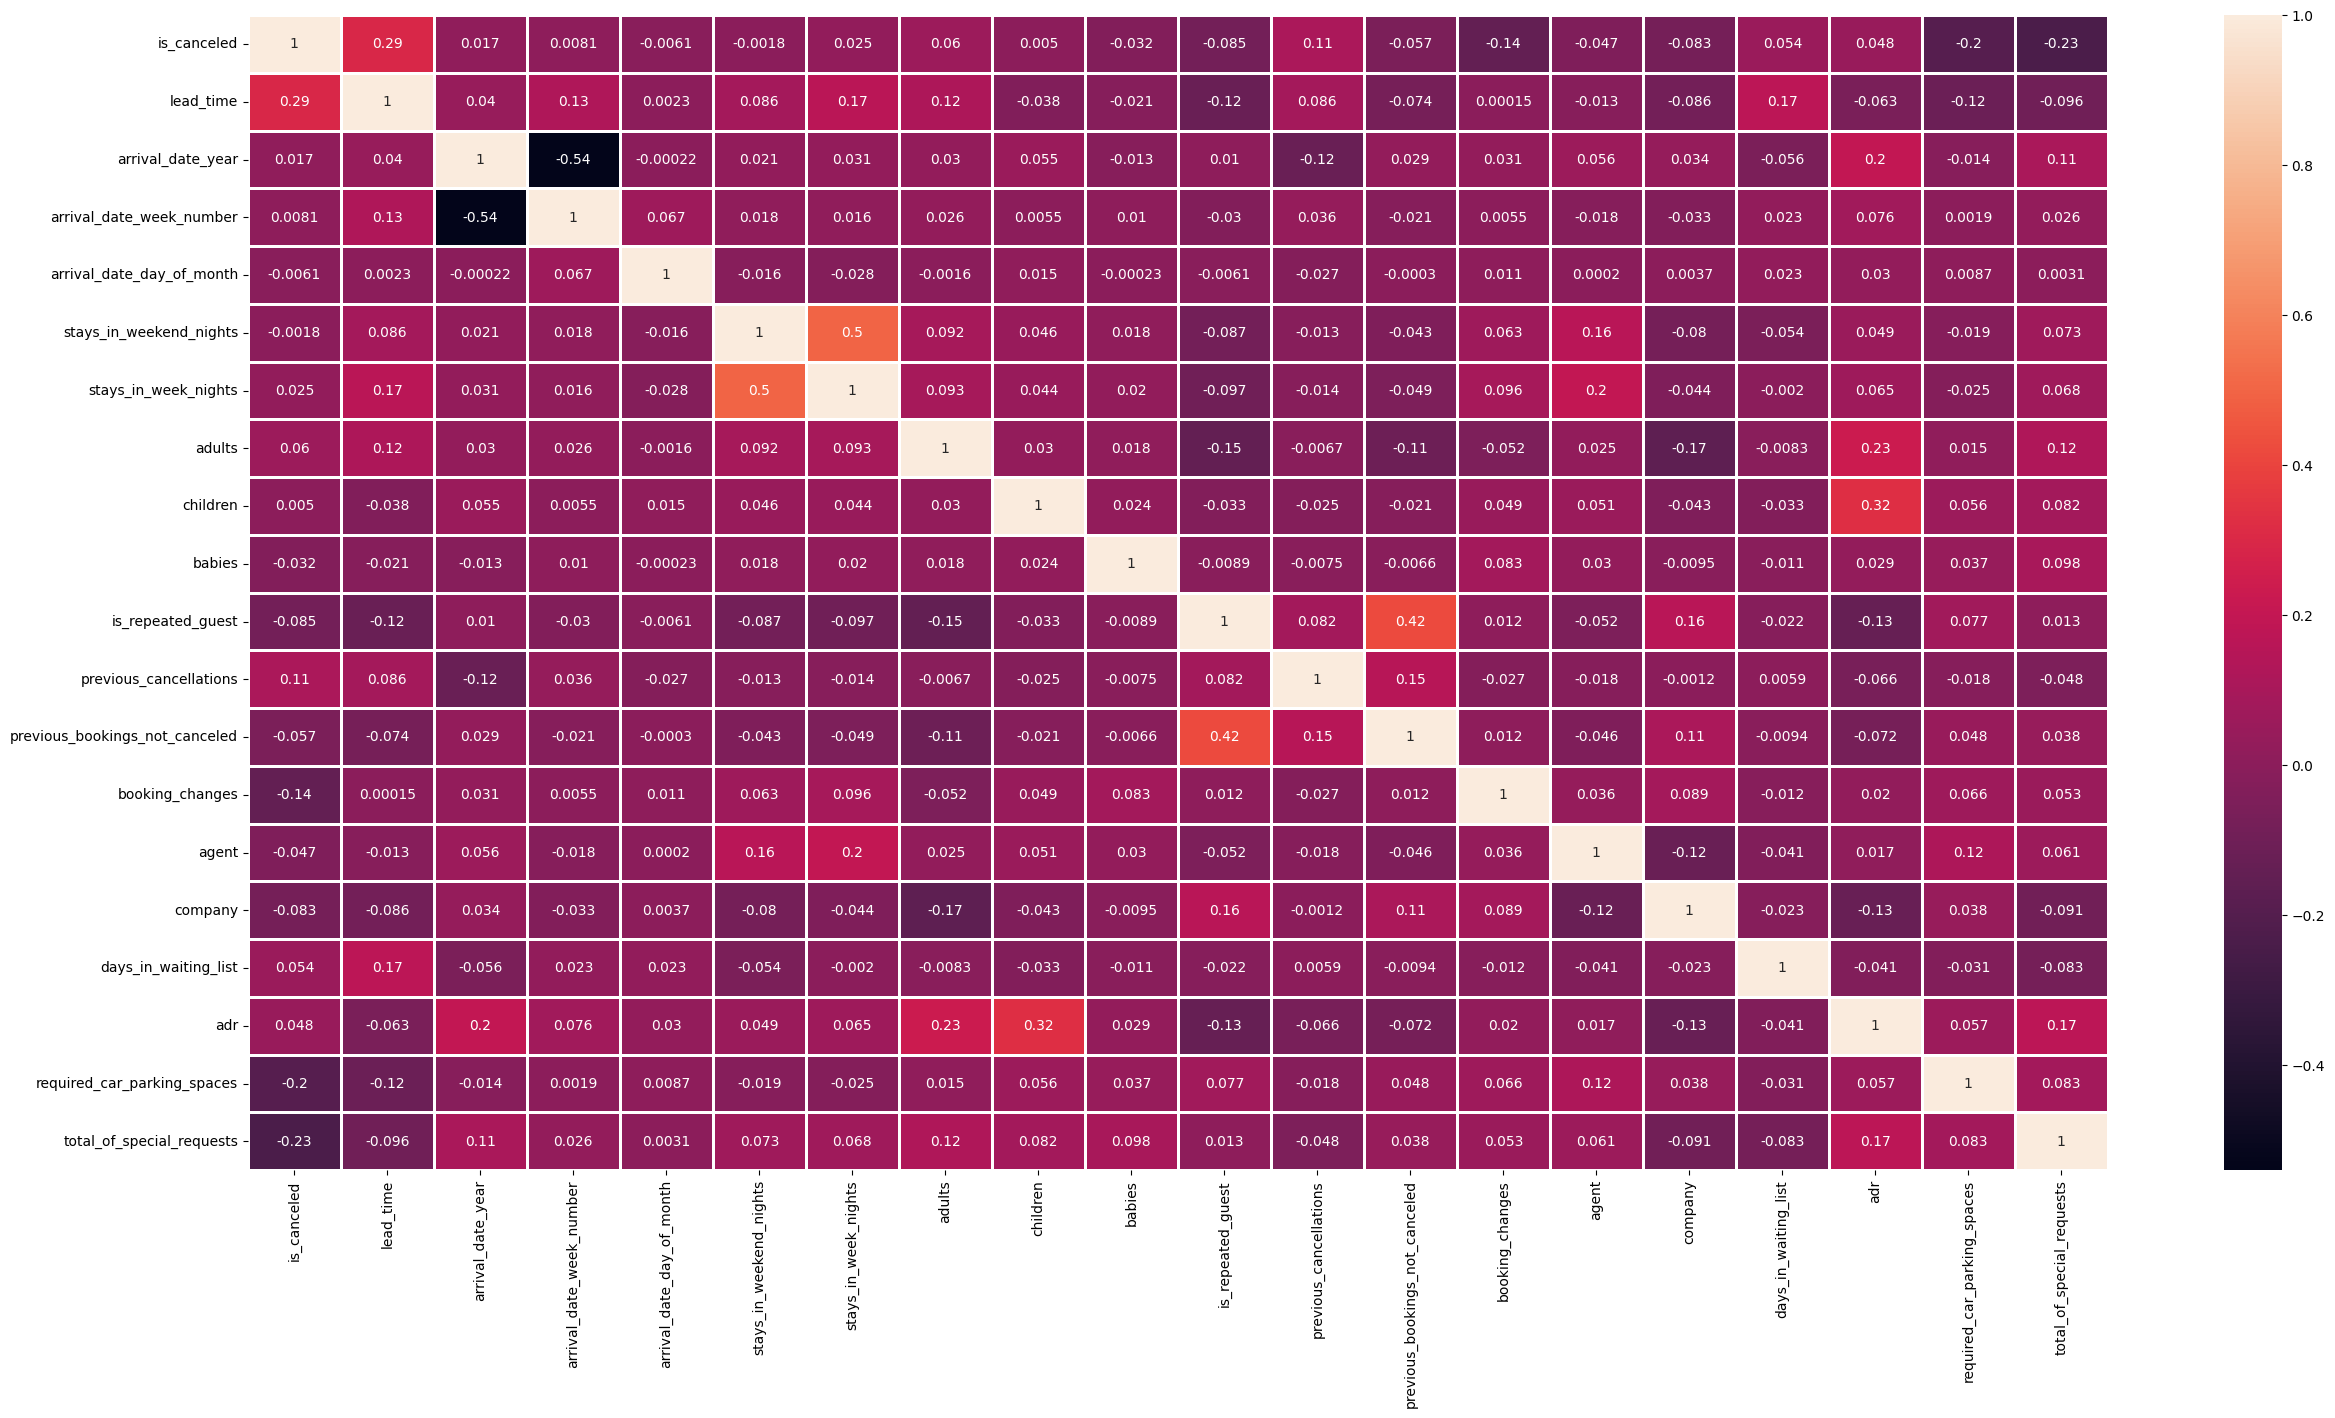

In [27]:
plt.figure(figsize = (30, 15))
correlation = hotel_raw_df.corr()
sns.heatmap(correlation, annot = True, linewidths = 1)
plt.show()

In [28]:
correlation = hotel_raw_df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

<ipython-input-28-f195a231d747>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = hotel_raw_df.corr()['is_canceled'].abs().sort_values(ascending = False)


is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [29]:
#removendo colunas não uteis
inuteis = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

hotel_raw_df.drop(inuteis, axis = 1, inplace = True)

In [30]:
#dataframe numerico-categorico
cat_cols = [col for col in hotel_raw_df.columns if hotel_raw_df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [31]:
cat_df = hotel_raw_df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [32]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

<ipython-input-32-b3c01191e8b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
<ipython-input-32-b3c01191e8b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['year'] = cat_df['reservation_status_date'].dt.year
<ipython-input-32-b3c01191e8b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [33]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [34]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [35]:
# from sklearn.preprocessing import LabelEncoder
# cat_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type']

# # create LabelEncoder object
# le = LabelEncoder()

# # apply LabelEncoder to each categorical column
# for col in cat_cols:
#     cat_df[col] = le.fit_transform(cat_df[col])

from sklearn.preprocessing import LabelEncoder

cat_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
le = LabelEncoder()
for col in cat_cols:
    cat_df[col] = le.fit_transform(cat_df[col])
    
cat_df.head()

<ipython-input-35-e37863acc438>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[col] = le.fit_transform(cat_df[col])
<ipython-input-35-e37863acc438>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[col] = le.fit_transform(cat_df[col])
<ipython-input-35-e37863acc438>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,1,0,3,1,2,0,2,2015,7,1
1,1,0,3,1,2,0,2,2015,7,1
2,1,0,3,1,0,0,2,2015,7,2
3,1,0,2,0,0,0,2,2015,7,2
4,1,0,6,3,0,0,2,2015,7,3


In [36]:
encoder = OrdinalEncoder()

# fit and transform the categorical columns in the dataframe
cat_df_encoded = encoder.fit_transform(cat_df[cat_cols])

# print the mapping of categories to integers
for i, col in enumerate(cat_cols):
    print(f"{col}: {encoder.categories_[i]}")

hotel: [0 1]
meal: [0 1 2 3 4]
market_segment: [0 1 2 3 4 5 6 7]
distribution_channel: [0 1 2 3 4]
reserved_room_type: [0 1 2 3 4 5 6 7 8 9]
deposit_type: [0 1 2]
customer_type: [0 1 2 3]


In [37]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
[1 0]

meal: 
[0 1 2 3 4]

market_segment: 
[3 2 6 5 1 4 7 0]

distribution_channel: 
[1 0 3 4 2]

reserved_room_type: 
[2 0 3 4 6 5 7 8 9 1]

deposit_type: 
[0 2 1]

customer_type: 
[2 0 3 1]

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [38]:
num_df = hotel_raw_df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df.drop(['arrival_date_month', 'reservation_status_date'], axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0


In [39]:
num_df.var()

lead_time                         11419.721511
arrival_date_week_number            185.099790
arrival_date_day_of_month            77.102966
stays_in_weekend_nights               0.997229
stays_in_week_nights                  3.641554
adults                                0.335543
children                              0.158846
babies                                0.009494
is_repeated_guest                     0.030894
previous_cancellations                0.712904
previous_bookings_not_canceled        2.242317
agent                             11479.398119
company                            2909.942594
adr                                2553.866100
required_car_parking_spaces           0.060168
total_of_special_requests             0.628529
dtype: float64

In [40]:
#normalizando variaveis numericas
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)
num_df.var()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


lead_time                         2.591420
arrival_date_week_number          0.441039
arrival_date_day_of_month         0.506267
stays_in_weekend_nights           0.997229
stays_in_week_nights              3.641554
adults                            0.335543
children                          0.158846
babies                            0.009494
is_repeated_guest                 0.030894
previous_cancellations            0.712904
previous_bookings_not_canceled    2.242317
agent                             3.536189
company                           1.350926
adr                               0.540353
required_car_parking_spaces       0.060168
total_of_special_requests         0.628529
dtype: float64

In [41]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0.000000,0.0,4.330733,0,0
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.720312,0.0,4.330733,0,0
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,0.0,4.595120,0,1


In [42]:
#GUARDAR ISSO PRA DEPOISSSSS
X = pd.concat([cat_df, num_df], axis = 1)
y = hotel_raw_df['is_canceled']
X.shape, y.shape

((119390, 26), (119390,))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [44]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
51487,0,0,5,3,0,1,2,2016,3,18,...,0.0,0,0,0,0,1.945910,0.0,4.615121,0,0
8131,1,0,6,3,0,0,2,2016,9,1,...,0.0,0,0,0,0,5.484797,0.0,4.867534,0,1
85382,0,0,6,3,3,0,2,2016,3,14,...,0.0,0,0,0,0,2.772589,0.0,4.318554,0,0
108142,0,3,6,3,0,0,2,2017,3,23,...,0.0,0,0,0,0,2.302585,0.0,4.499810,0,1
43709,0,0,4,3,0,0,3,2015,9,25,...,0.0,0,0,0,0,0.693147,0.0,4.143135,0,0


In [45]:
X_test.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
23503,1,0,3,1,0,0,3,2016,4,27,...,0.0,0,0,0,0,0.000000,0.0,4.174387,0,0
2673,1,0,6,3,4,0,2,2015,10,3,...,0.0,0,0,0,0,5.484797,0.0,4.343805,0,2
111055,0,3,6,3,0,0,2,2017,5,6,...,0.0,0,0,0,0,2.302585,0.0,4.691348,0,1
107359,0,0,6,3,0,0,2,2017,3,12,...,0.0,0,0,0,0,2.302585,0.0,4.587006,0,0
96361,0,0,6,3,3,0,2,2016,9,2,...,0.0,0,0,0,0,2.302585,0.0,5.077047,0,2


In [46]:
y_train.head(), y_test.head()

(51487     1
 8131      1
 85382     0
 108142    0
 43709     0
 Name: is_canceled, dtype: int64,
 23503     0
 2673      1
 111055    0
 107359    0
 96361     0
 Name: is_canceled, dtype: int64)

Modelos

In [47]:
#knn
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_kn = accuracy_score(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn) #printar
conf = confusion_matrix(y_test, y_pred_knn) #printar

print(f'Acurácia do KNN: {acc_kn}')

Acurácia do KNN: 0.8851104224251054


In [48]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
# print(f"Confusion Matrix : \n{conf}")
# print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9448585867046375


In [51]:
X = pd.concat([cat_df, num_df], axis = 1)
y = to_categorical(hotel_raw_df['is_canceled'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

model  = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (26, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
2612/2612 [==============================] - 12s 4ms/step - loss: 1.0851 - accuracy: 0.6591 - val_loss: 0.9470 - val_accuracy: 0.6480
Epoch 2/100
2612/2612 [==============================] - 8s 3ms/step - loss: 0.7646 - accuracy: 0.7152 - val_loss: 0.5525 - val_accuracy: 0.7654
Epoch 3/100
2612/2612 [==============================] - 17s 7ms/step - loss: 0.6789 - accuracy: 0.7295 - val_loss: 0.6219 - val_accuracy: 0.7988
Epoch 4/100
2612/2612 [==============================] - 7s 3ms/step - loss: 0.5762 - accuracy: 0.7484 - val_loss: 0.6155 - val_accuracy: 0.5964
Epoch 5/100
2612/2612 [==============================] - 9s 3ms/step - loss: 0.5568 - accuracy: 0.7532 - val_loss: 0.5147 - val_accuracy: 0.7804
Epoch 6/100
2612/2612 [==============================] - 7s 3ms/step - loss: 0.5010 - accuracy: 0.7707 - val_loss: 0.5132 - val_accuracy: 0.7883
Epoch 7/100
2612/2612 [==============================] - 9s 3ms/step - loss: 0.4842 - accuracy: 0.7809 - val_loss: 0.4358 - val_

In [55]:
plt.figure(figsize = (15, 10))
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy'] 
epoch = range(1, 101)


accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})

px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',template = 'plotly_dark')

<Figure size 1500x1000 with 0 Axes>

In [56]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')

1120/1120 [==============================] - 4s 4ms/step - loss: 0.1329 - accuracy: 0.9556
Accuracy of model is 0.9556076526641846
